In [6]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/IMDB/IMDB Dataset.csv")

# data = pd.read_csv("./IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
data['sentiment'].replace('positive',1,inplace=True)
data['sentiment'].replace('negative',0,inplace=True)

data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


<Axes: xlabel='sentiment', ylabel='count'>

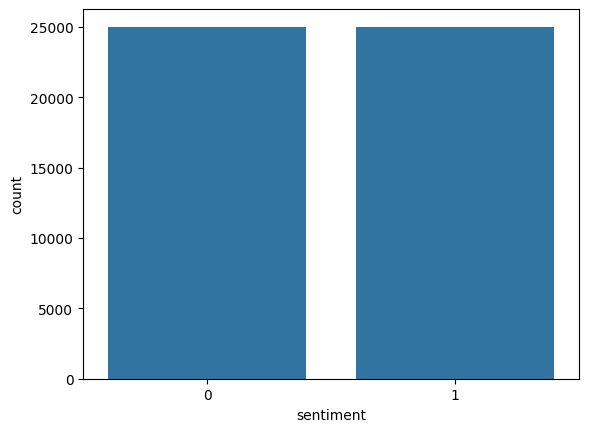

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment',data=data)

<Axes: xlabel='sentiment'>

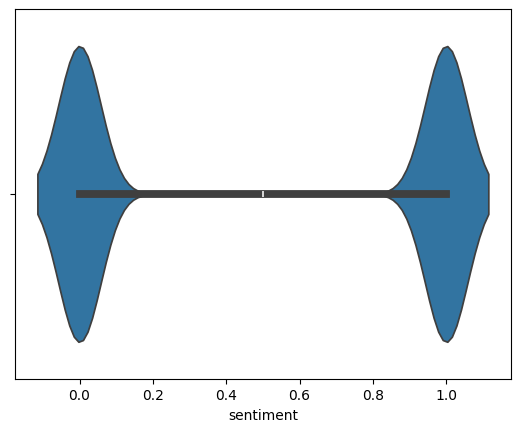

In [9]:
sns.violinplot(x='sentiment',data=data)


In [10]:

columns = []
for i in data.columns:
  columns.append(i)
print(columns)


['review', 'sentiment']


In [11]:
data.isnull().sum()


review       0
sentiment    0
dtype: int64

In [12]:
data.shape


(50000, 2)

In [13]:
data.describe()


,sentiment
count,50000.000000
mean,0.500000
std,0.500005
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [15]:
longest_review = data['review'][0]
for i in data['review']:
  if len(i) > len(longest_review):
    longest_review = i
print(longest_review)
print(len(longest_review))

Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, but

In [16]:
shortest = data['review'][0]
for i in data['review']:
  if len(i) < len(shortest):
    shortest = i
print(shortest)



Read the book, forget the movie!


In [17]:
for i in range(len(data['review'])):
  if data["review"][i] == "Read the book, forget the movie!":
    print("The shortest review is at index:",i)

The shortest review is at index: 27521


In [18]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer


In [19]:
x = data["review"]
y = data["sentiment"]


In [20]:
tokenizer = Tokenizer(10000,lower=True)
tokenizer.fit_on_texts(x)
x[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [21]:
sequence = tokenizer.texts_to_sequences(x)
sequence[1]

[3,
 393,
 120,
 353,
 7,
 7,
 1,
 1385,
 2977,
 6,
 52,
 52,
 155,
 55,
 2381,
 1582,
 2,
 411,
 3,
 2,
 530,
 282,
 4,
 1847,
 5,
 1,
 438,
 412,
 7,
 7,
 1,
 150,
 23,
 568,
 69,
 2274,
 498,
 4571,
 21,
 61,
 45,
 189,
 29,
 1,
 18,
 28,
 45,
 29,
 1,
 2294,
 175,
 3336,
 96,
 22,
 67,
 371,
 63,
 1,
 791,
 9719,
 31,
 1,
 1825,
 5,
 7366,
 6594,
 21,
 61,
 6,
 9,
 69,
 278,
 1,
 147,
 18,
 9,
 6,
 3,
 407,
 2,
 2406,
 412,
 3,
 4339,
 353,
 42,
 27,
 4,
 1,
 78,
 4,
 202,
 2,
 24,
 114,
 7,
 7,
 1,
 1847,
 62,
 270,
 344,
 16,
 1,
 120,
 177,
 1,
 1029,
 4,
 1,
 2924,
 60,
 248,
 71,
 356,
 1,
 2206,
 3127,
 1289,
 1192,
 91,
 4911,
 9,
 297,
 20,
 260,
 1830,
 2,
 260,
 4592,
 583,
 16,
 1,
 134,
 3690,
 2,
 2,
 1,
 730,
 583,
 4,
 65,
 1054,
 16,
 170,
 2297,
 23,
 1977,
 69,
 221]

In [22]:
from keras.preprocessing.sequence import pad_sequences


In [23]:
encoded_sequence = pad_sequences(sequence,maxlen=200,padding='pre')
encoded_sequence[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    3,  393,  120,  353,    7,
          7,    1, 1385, 2977,    6,   52,   52,  155,   55, 2381, 1582,
          2,  411,    3,    2,  530,  282,    4, 1847,    5,    1,  438,
        412,    7,    7,    1,  150,   23,  568,   69, 2274,  498, 4571,
         21,   61,   45,  189,   29,    1,   18,   28,   45,   29,    1,
       2294,  175, 3336,   96,   22,   67,  371,   63,    1,  791, 9719,
         31,    1, 1825,    5, 7366, 6594,   21,   61,    6,    9,   69,
        278,    1,  147,   18,    9,    6,    3,  407,    2, 2406,  412,
          3, 4339,  353,   42,   27,    4,    1,   78,    4,  202,    2,
         24,  114,    7,    7,    1, 1847,   62,  2

In [24]:
import numpy as np
final_input = encoded_sequence
final_output = np.array(y)

In [25]:
final_output


array([1, 1, 1, ..., 0, 0, 0])

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_input,final_output, test_size=0.33, random_state=42)


In [27]:
print(x_train.shape, y_train.shape)


(33500, 200) (33500,)


In [28]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dropout,Dense,Embedding

In [29]:
model = Sequential()
model.add(
    Embedding(
        input_dim=10000,
        output_dim=120,
        input_length=200,
    ),)
model.add(
    Bidirectional(LSTM(64, return_sequences=True))
)
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1))

In [30]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 120)          1200000   
                                                                 
 bidirectional (Bidirection  (None, 200, 128)          94720     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1336001 (5.10 MB)
Trainable params: 1336001 (5.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [32]:
prediction = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=2,batch_size=32)


Epoch 1/2
1047/1047 [==============================] - 522s 490ms/step - loss: 0.5440 - accuracy: 0.7556 - val_loss: 0.3865 - val_accuracy: 0.8348
Epoch 2/2
1047/1047 [==============================] - 513s 490ms/step - loss: 0.3444 - accuracy: 0.8676 - val_loss: 0.3713 - val_accuracy: 0.8744


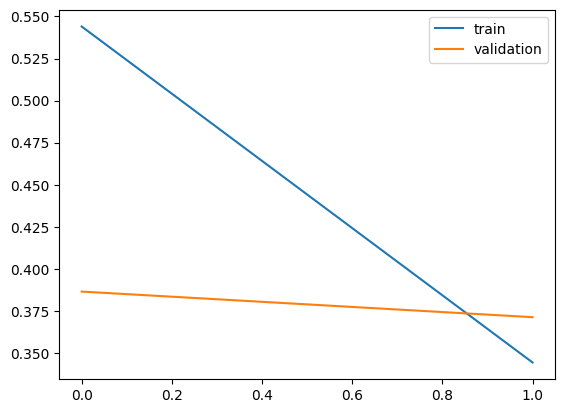

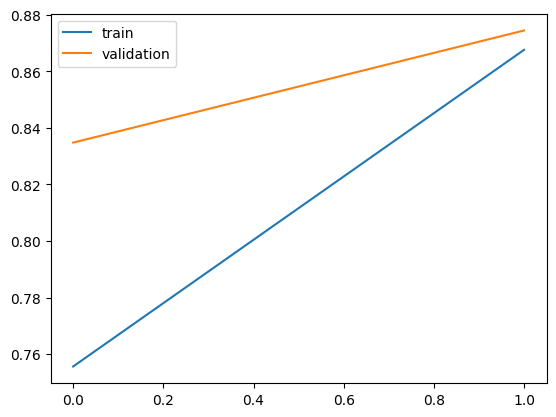

In [33]:
plt.plot(prediction.history['loss'],label='train')
plt.plot(prediction.history['val_loss'],label='validation')
plt.legend(loc='best')
plt.show()

plt.plot(prediction.history['accuracy'],label='train')
plt.plot(prediction.history['val_accuracy'],label='validation')
plt.legend(loc='best')
plt.show()

In [35]:
model.save("imdb_review.keras")


In [43]:
def imdb_bot(review):
  sentence_list = []
  sentence_list.append(review)
  sequence = tokenizer.texts_to_sequences(sentence_list)
  input = pad_sequences(sequence,maxlen=200,padding='pre')
  output = (model.predict(input) > 0.5).astype("int32")
  if output == 1:
    print("Good review, watch it.")
  else:
    print("You probably should try another movie, this one's not that good")


review = "Finally saw this movie (yes 4 years late) and I understand why Leonardo won the Oscar, along with the many academy awards the movie and director won. It is a cinematic masterpiece. The cinematography is amazing, the whole cast (Tom Hardy is great here) is great. The costumes and weapons used (early 1800s) look so damn good. The story is very simple and not complicated. It is about revenge and surviving in the cold and icy wilderness of 1823. The action scenes are brutal and gritty, like they should be for that time period. Officially in my top 10 movies of all time. If you've never seen this film, do yourself a favor and rent it or buy it. It definitely deserves to be in your collection. Some people might not like all the spiritual stuff or reading subtitles (lots of Native American language here) but it is needed since there a lot of interaction with Native American tribes here"
imdb_bot(review)


1/1 [==============================] - 0s 72ms/step
Good review, watch it.
